# Análisis de Ventas de Videojuegos

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general 

In [495]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import plotly.express as px

In [496]:
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2. Prepara los datos

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [498]:
df.columns = df.columns.str.lower()
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Convierte los datos en los tipos necesarios.

In [499]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()).astype('int64')

df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

df['critic_score'] = df['critic_score'].replace('tbd', None)

df['user_score'] = df['user_score'].replace('tbd', None).astype('float64')

df['rating'] = df['rating'].fillna('Unknown')

df['genre'] = df['genre'].fillna('Unknown')

df['name'] = df['name'].fillna('Unknown')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
###### A la columna 'Year of release' se le cambio el formato para que lo leyera con fecha por si tenemos que hacer análisis.

- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
###### Los valores nulos de 'Año de lanzamiento' decidí rellenarlos con la mediana de la columna y los valores de la columna 'Nombre', 'Genero' y 'Rating', decidí simplemente rellanarlos como desconocidos.

- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
###### Los valores ausentes en estas columnas pueden ser el resultado de varias razones, desde problemas de clasificación y recolección de datos hasta la naturaleza misma de los juegos. La falta de clasificación en algunas de estas categorías refleja, en muchos casos, limitaciones en la documentación o en el registro de ciertos títulos, especialmente en juegos de nicho o antiguos, o aquellos que no fueron oficialmente lanzados o clasificados.

- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
###### Planeo manejar los valores TBD como valores nulos para poder cambiar el tipo de la columna a float64 y así poder hacer los análisis

### Calcula las ventas totales para cada juego y coloca estos valores en una columna separada.

In [500]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


# Paso 3. Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años.

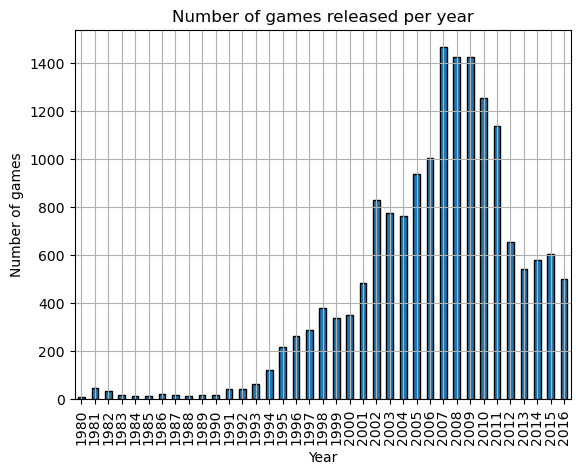

In [501]:
games_per_year = df.groupby('year_of_release')['name'].count()

games_per_year.plot(kind='bar',
                     title='Number of games released per year',
                       ylabel='Number of games', xlabel='Year',
                         edgecolor='black',
                         grid=True)

plt.show()

- ¿Son significativos los datos para cada período?
###### Si, en la gráfica podemos ver que el número de juegos cada año ha ido en crecimiento, con un aumento considerable en el año 2002 tal vez con la salida del PS2, pero con una caída apartir del año 2011 reduciendo a casi la mitad.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

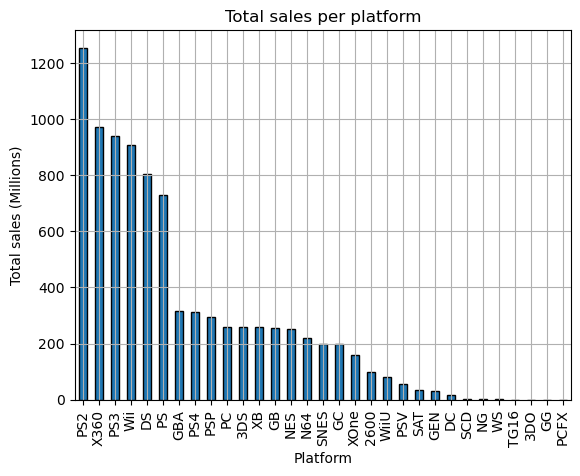

In [502]:
total_sales_per_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

total_sales_per_platform.plot(kind='bar', title='Total sales per platform',
                              ylabel='Total sales (Millions)', xlabel='Platform',
                              edgecolor='black',
                              grid=True)

plt.show()

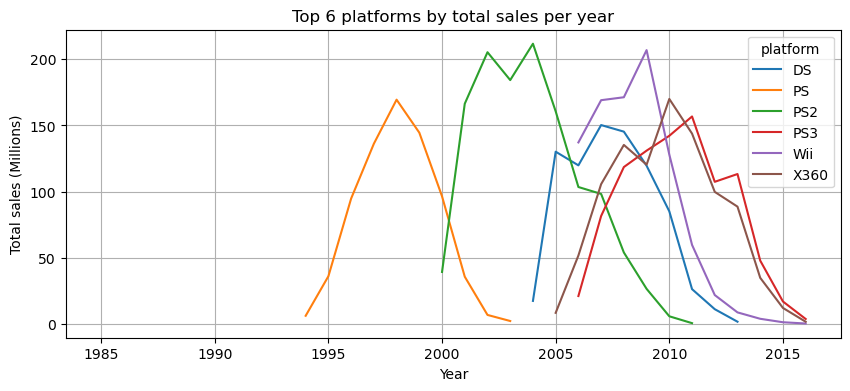

In [503]:
popular_platforms = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]

sales_by_year = popular_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales_by_year.plot(kind='line',
                    title='Top 6 platforms by total sales per year',
                      figsize=(10, 4),
                        ylabel='Total sales (Millions)',
                        xlabel='Year',
                          grid=True)

plt.show()

In [504]:
# Encontrar el primer y ultimo año de ventas por plataforma
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# promedio de vida util
avg_lifespan = platform_lifespan['lifespan'].mean()
print(f"Las antiguas plataformas tardan en desaparecer en promedio {avg_lifespan:.2f} años.")

# Tiempo promedio para que una nueva plataforma alcance su punto máximo de popularidad
popular_platforms = total_sales_per_platform.head(5).index
first_years = df[df['platform'].isin(popular_platforms)].groupby('platform')['year_of_release'].min()
avg_popularity_time = (first_years.median() - first_years.mean())
print(f"Las nuevas plataformas tardan aproximadamente {avg_popularity_time:.2f} años en alcanzar su punto máximo de popularidad.")


Las antiguas plataformas tardan en desaparecer en promedio 8.94 años.
Las nuevas plataformas tardan aproximadamente 4.60 años en alcanzar su punto máximo de popularidad.


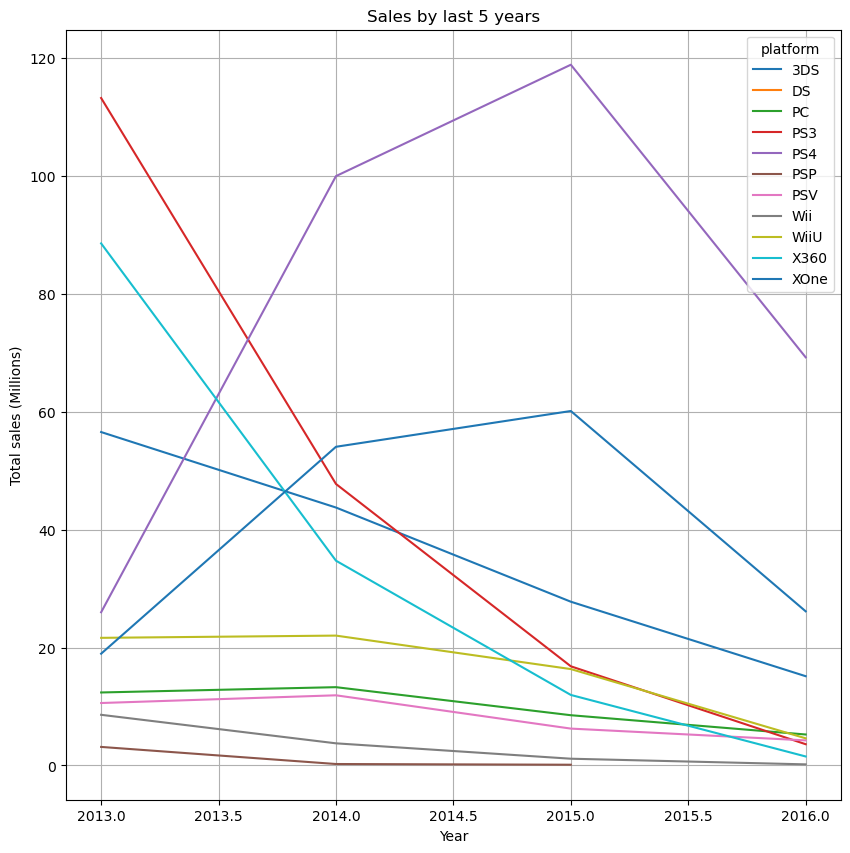

In [505]:
last_5_years = df[df['year_of_release'] >= 2013]

sales_by_year = last_5_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales_by_year.plot(kind='line',
                   title='Sales by last 5 years',
                    ylabel='Total sales (Millions)',
                    xlabel='Year',
                    grid=True,
                    figsize=(10, 10,))
plt.show()

###### Se tomaron los datos de los últimos 5 años

- ¿Qué plataformas son líderes en ventas?
###### Las plataformas lideres en ventas son: 'PS2', 'Wii', 'PS', 'X360', 'PS3' y 'DS'.

- Cuales crecen y cuales se reducen?
###### Las plataformas que más crecen son: 'PS4' y 'XOne'.
###### Las plataformas que se reducen son practicamente todas pero en especial: 'X360' y 'PS3'

###### Las plataformas de antigua generación se reducen y las nuevas van en aumento con una ligera caída.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

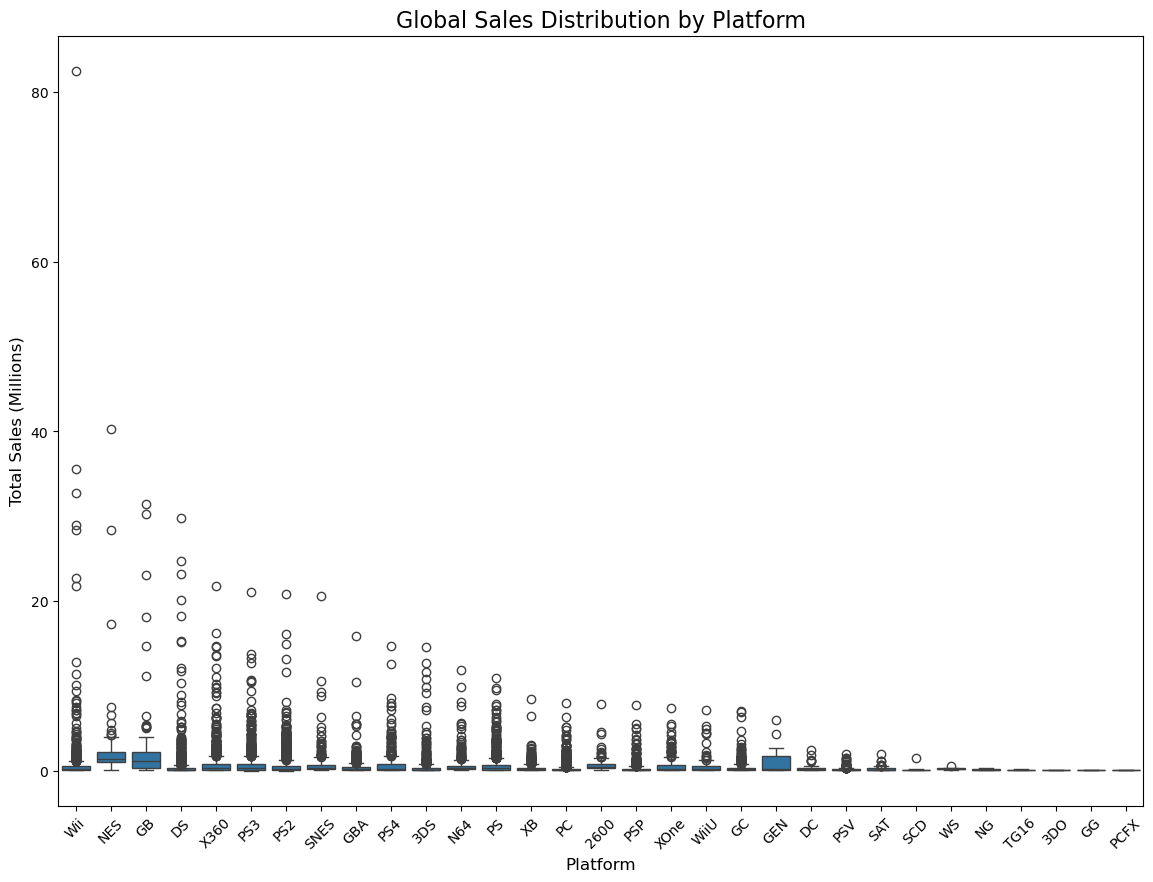

In [506]:
# Crear el diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x='platform', y='total_sales')

plt.title('Global Sales Distribution by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

- ¿Son significativas las diferencias en las ventas?
###### Algunas plataformas tienen picos de ventas más altos que otras, liderando Wii, NES, GB y DS.

- ¿Qué sucede con las ventas promedio en varias plataformas?
###### Las ventas promedio en general son muy parecidad en cada una de las plataformas con ligeras variaciones.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

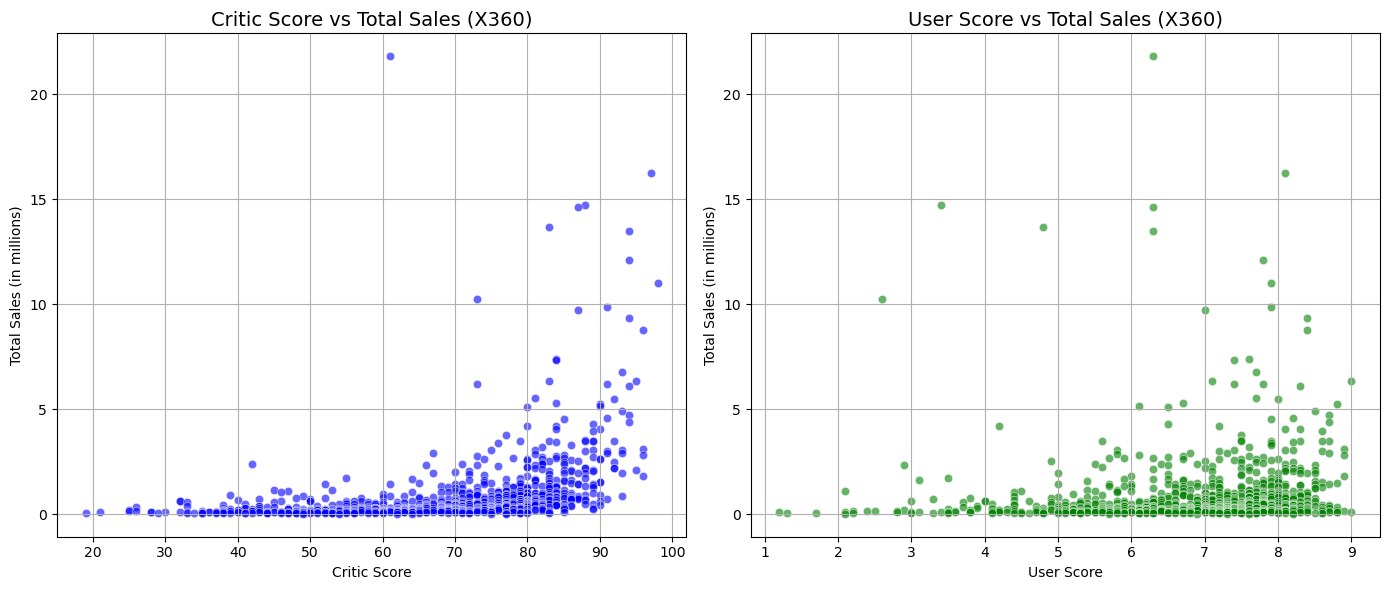

In [507]:
platform = df[df['platform'] == 'X360']

platform = platform.dropna(subset=['critic_score', 'user_score', 'total_sales'])

plt.figure(figsize=(14, 6))

# Gráfico de dispersión: Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=platform, x='critic_score', y='total_sales', color='blue', alpha=0.6)
plt.title('Critic Score vs Total Sales (X360)', fontsize=14)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

# Gráfico de dispersión: User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=platform, x='user_score', y='total_sales', color='green', alpha=0.6)
plt.title('User Score vs Total Sales (X360)', fontsize=14)
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [508]:
# Calcular la correlación
critic_corr = platform['critic_score'].corr(platform['total_sales'])
user_corr = platform['user_score'].corr(platform['total_sales'])

print(f"Correlación entre Critic Score y Total Sales: {critic_corr:.2f}")
print(f"Correlación entre User Score y Total Sales: {user_corr:.2f}")

Correlación entre Critic Score y Total Sales: 0.39
Correlación entre User Score y Total Sales: 0.11


###### Los críticos parecen ser una fuente más confiable para los consumidores al momento de decidir sobre un juego, lo que se refleja en la correlación más alta.
###### Los usuarios pueden ser más diversos en sus opiniones y, por lo tanto, las puntuaciones de los usuarios tienden a ser más variables y menos determinantes para las ventas.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas

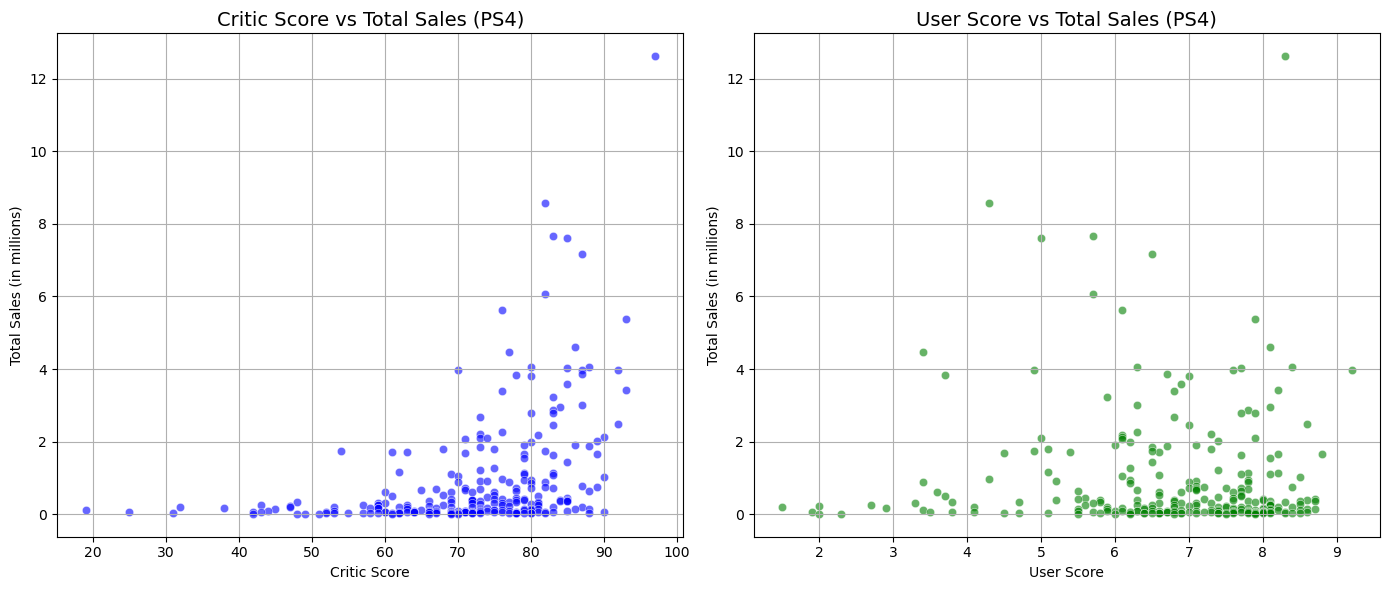

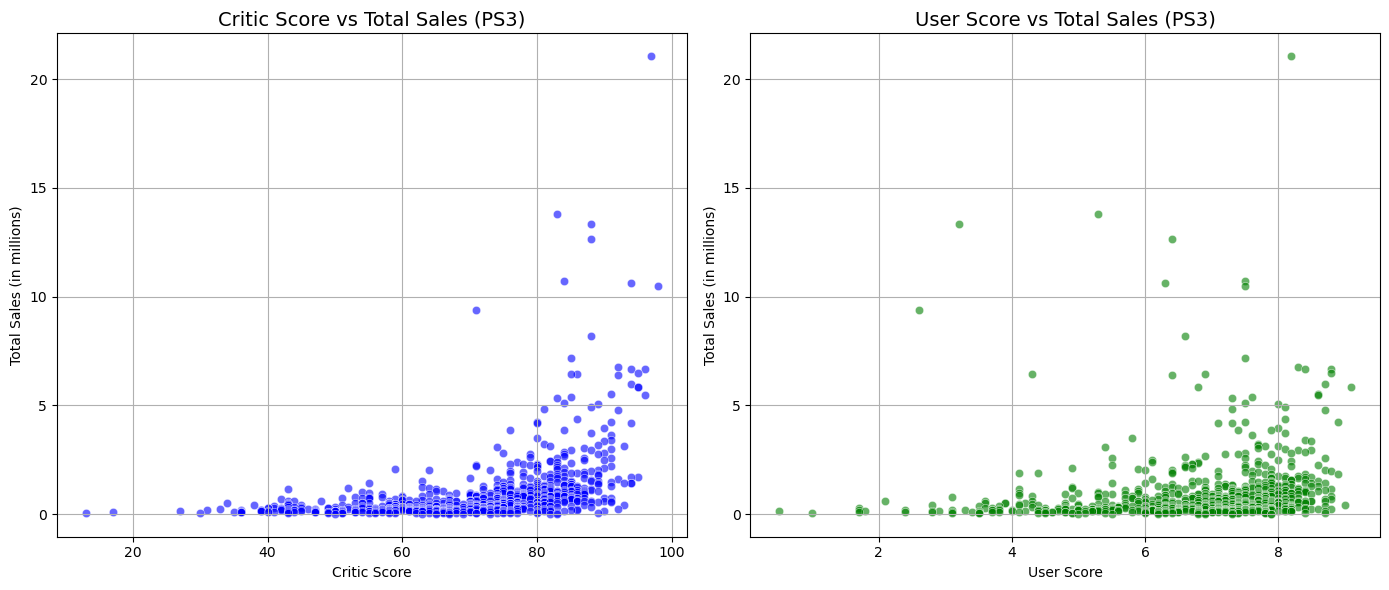

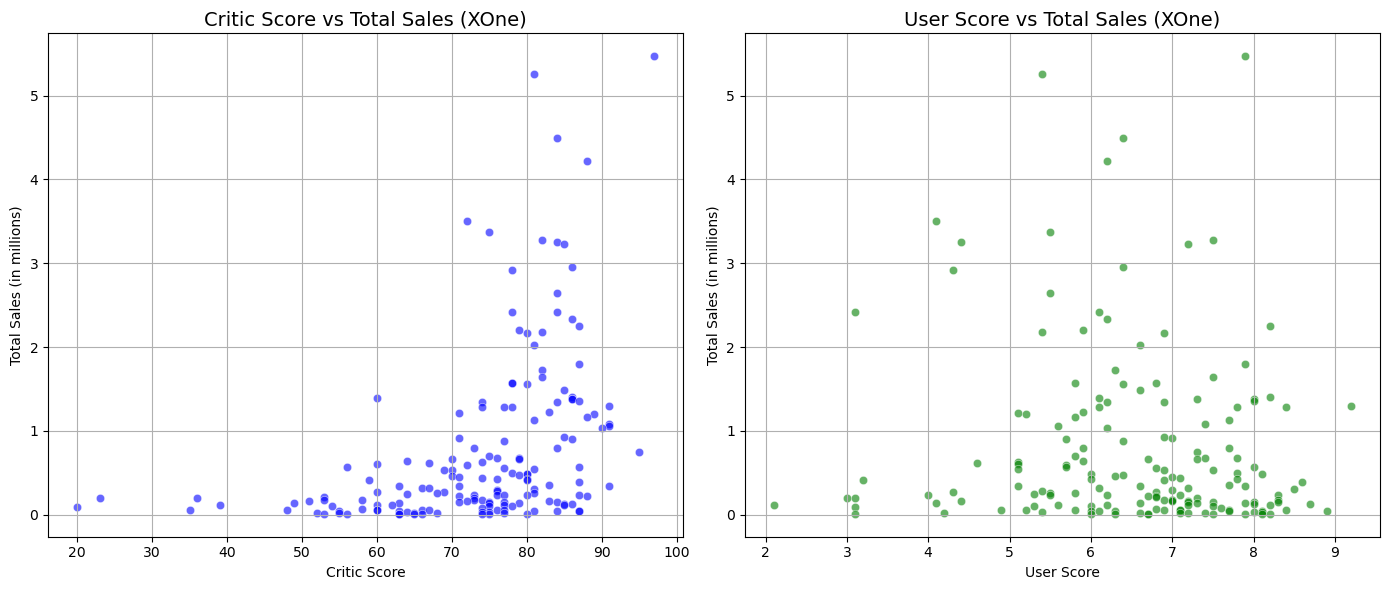

In [509]:
def plot_sales_vs_scores(df, platforms):
  
    for platform_name in platforms:
        
        platform = df[df['platform'] == platform_name]
        
        
        platform = platform.dropna(subset=['critic_score', 'user_score', 'total_sales'])
        
        
        plt.figure(figsize=(14, 6))

        # Gráfico de dispersión: Critic Score vs Ventas
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=platform, x='critic_score', y='total_sales', color='blue', alpha=0.6)
        plt.title(f'Critic Score vs Total Sales ({platform_name})', fontsize=14)
        plt.xlabel('Critic Score')
        plt.ylabel('Total Sales (in millions)')
        plt.grid(True)

        # Gráfico de dispersión: User Score vs Ventas
        plt.subplot(1, 2, 2)
        sns.scatterplot(data=platform, x='user_score', y='total_sales', color='green', alpha=0.6)
        plt.title(f'User Score vs Total Sales ({platform_name})', fontsize=14)
        plt.xlabel('User Score')
        plt.ylabel('Total Sales (in millions)')
        plt.grid(True)

        # Mostrar los gráficos
        plt.tight_layout()
        plt.show()

# Llamar a la función para analizar las plataformas PS4, PS3, XONE y X360
plot_sales_vs_scores(df, ['PS4', 'PS3', 'XOne'])


###### Para todos los casos la correlación parece ser la misma, en el caso de Critic Score entre mas alta es la puntuación mayores son las ventas a excepciones de algunos casos donde no importa que la critica sea baja, en el caso de User Score la correlación en muy baja, demasiado dispersa, al parecer a las personas no les importan tanto las criticas de otros usuarios y se fijan más en la de la critica.

### Echa un vistazo a la distribución general de los juegos por género.

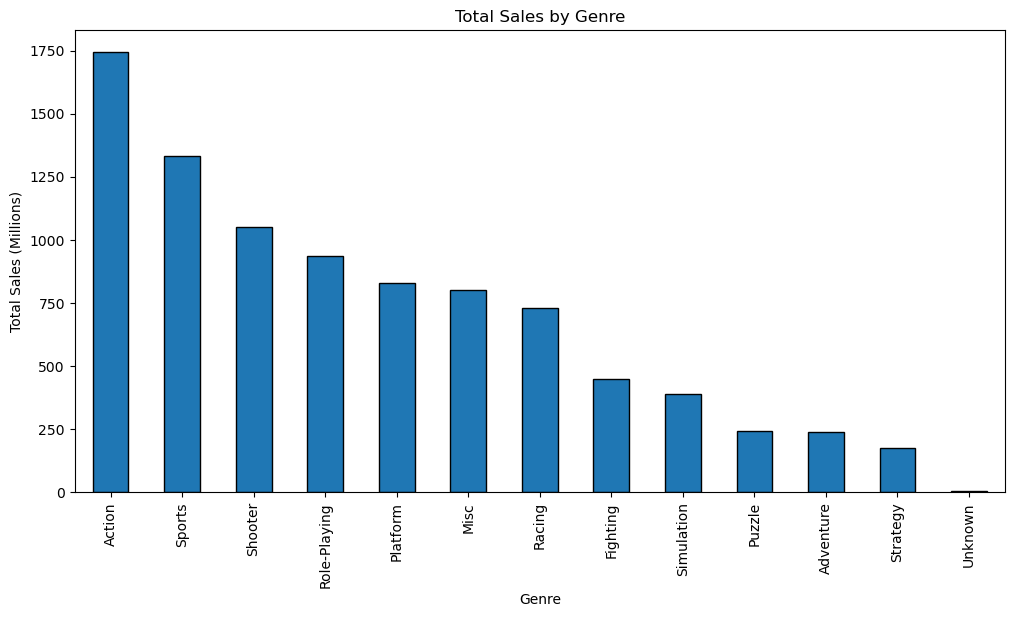

Sales by Genre (Mean and Std Dev):
                  mean       std
genre                           
Unknown       1.210000  1.668772
Platform      0.932173  2.574506
Shooter       0.795503  1.816425
Role-Playing  0.623872  1.710178
Racing        0.583403  1.656602
Sports        0.566980  2.084778
Fighting      0.527126  0.952304
Action        0.517711  1.145597
Misc          0.458577  1.304635
Simulation    0.446701  1.186820
Puzzle        0.418224  1.562444
Strategy      0.255095  0.518998
Adventure     0.182341  0.508533


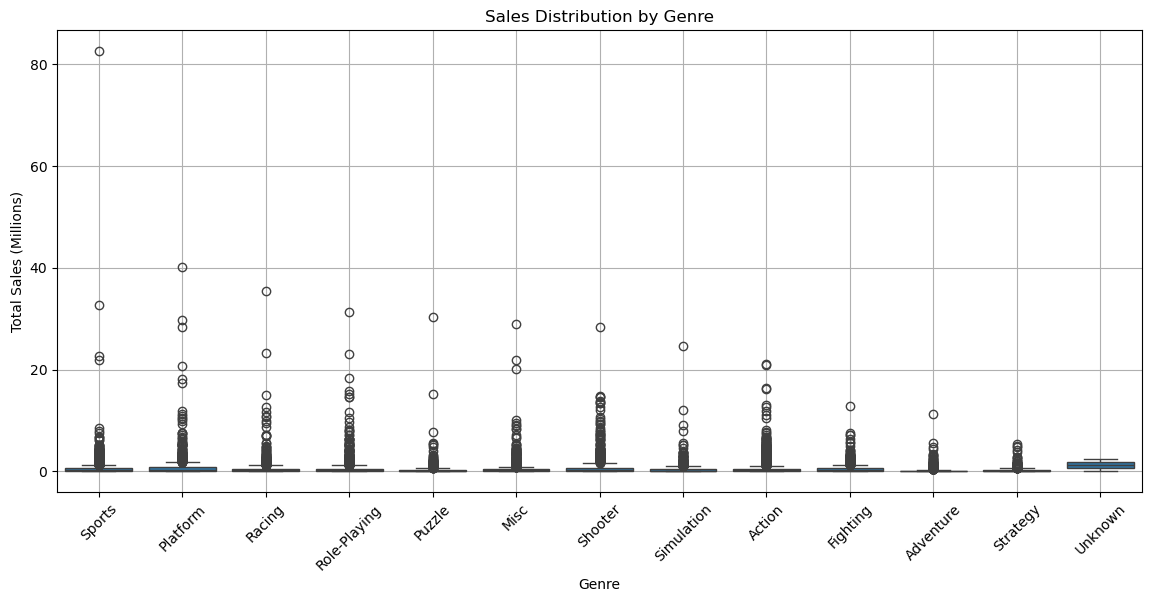

In [510]:
group_by_genre = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

sales_by_genre_stats = df.groupby('genre')['total_sales'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Crear gráfico de barras para ventas totales por género
plt.figure(figsize=(12, 6))
group_by_genre.plot(kind='bar', edgecolor='black', title='Total Sales by Genre', ylabel='Total Sales (Millions)', xlabel='Genre')
plt.show()

# Mostrar estadísticas de media y desviación estándar por género
print("Sales by Genre (Mean and Std Dev):")
print(sales_by_genre_stats)

# Crear un gráfico para ver la distribución de las ventas por género
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='genre', y='total_sales')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- ¿Qué se puede decir de los géneros más rentables?

###### Los géneros como Shooter, Role-Playing, y Sports tienen una buena media y tienen ventas consistentes, lo que los hace rentables de manera estable

- ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

###### Unknown tiene un promedio más alto de ventas, pero su alta desviación estándar sugiere que es un género más riesgoso. Los juegos en este género pueden tener grandes éxitos, pero también pueden tener fracasos.

# Paso 4. Crea un perfil de usuario para cada región
# Para cada región (NA, EU, JP) determina:

### Las cinco plataformas principales.

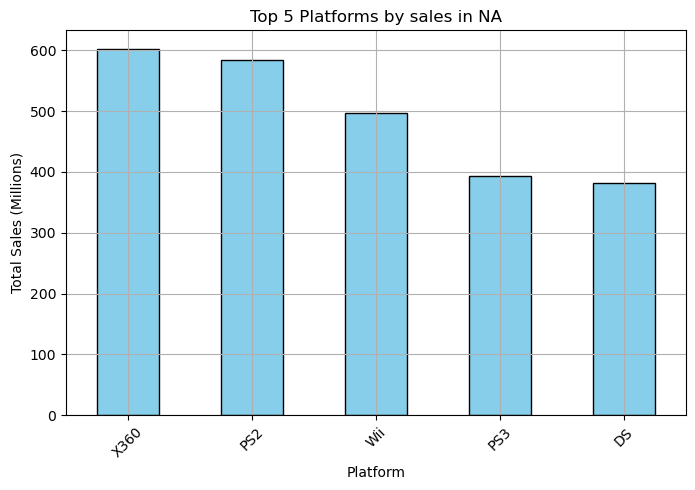

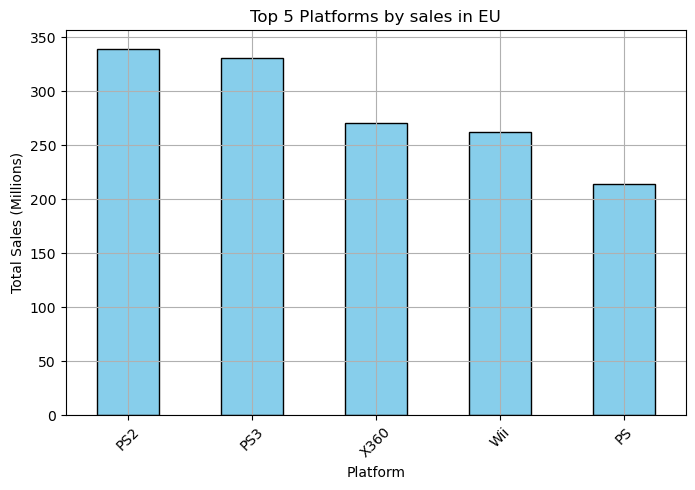

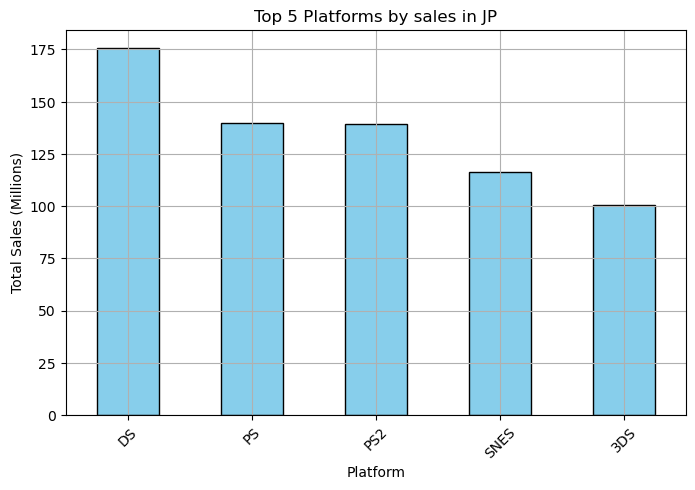

In [511]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    # Calcular las 5 plataformas principales por región
    top_platforms = (
        df.groupby('platform')[region]
        .sum()
        .nlargest(5)
        .sort_values(ascending=False)
    )

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    top_platforms.plot(
        kind='bar',
        color='skyblue',
        edgecolor='black',
        title=f'Top 5 Platforms by sales in {region[:2].upper()}',
        ylabel='Total Sales (Millions)',
        xlabel='Platform',
        grid=True,
        rot=45,
    )

plt.show()



###### NA: La cuota de mercado de Xbox es la más alta, y la competencia con PlayStation es más equilibrada. Nintendo tiene presencia pero no lidera.
###### EU: PlayStation domina el mercado, con Xbox en tercer lugar y Nintendo en una posición estable pero no dominante.
###### JP: Nintendo y Sony dominan el mercado, mientras que Xbox tiene una presencia casi nula.

### Los cinco géneros principales

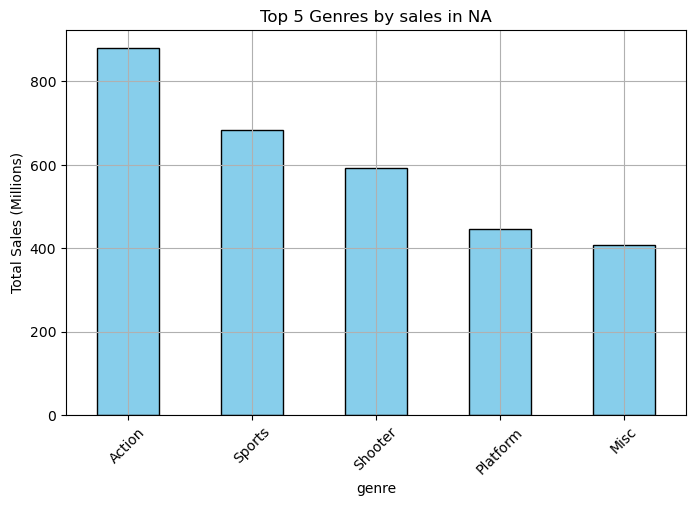

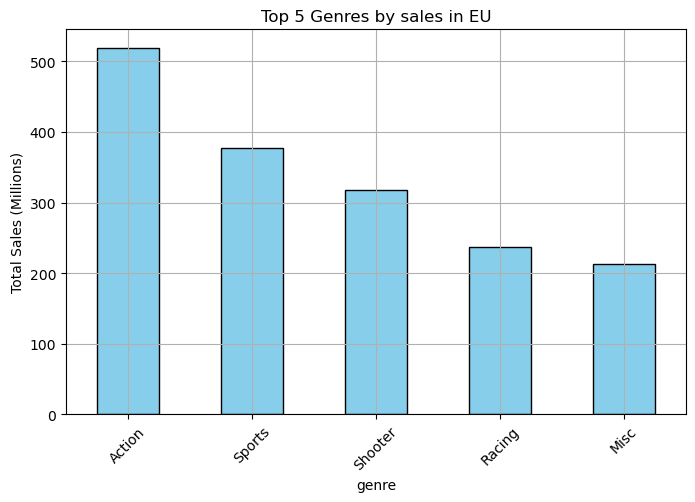

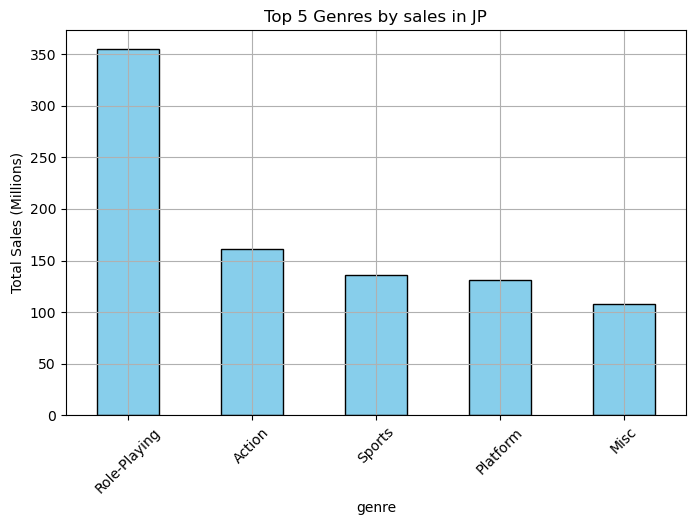

In [512]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    # Calcular las 5 plataformas principales por región
    top_platforms = (
        df.groupby('genre')[region]
        .sum()
        .nlargest(5)
        .sort_values(ascending=False)
    )

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    top_platforms.plot(
        kind='bar',
        color='skyblue',
        edgecolor='black',
        title=f'Top 5 Genres by sales in {region[:2].upper()}',
        ylabel='Total Sales (Millions)',
        xlabel='genre',
        grid=True,
        rot=45,
    )

plt.show()

###### Las diferencias muestran cómo factores culturales y preferencias regionales afectan el consumo de videojuegos:

###### NA y EU tienen preferencias más similares, con géneros de acción, deportes y disparos dominando.
###### JP tiene un enfoque único en RPGs, acompañado por géneros más enfocados en historias y mecánicas familiares.
###### Esto indica que las empresas de videojuegos deben adaptar sus estrategias de desarrollo y marketing según las preferencias de cada mercado.

### Las clasificaciones de ESRB afectan a las ventas en regiones individuales.

         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1292.99    710.25    198.11
E10+       353.32    188.52     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          748.48    483.97     64.24
RP           0.00      0.08      0.00
T          759.75    427.03    151.40
Unknown   1242.46    613.83    841.96
         na_sales  eu_sales  jp_sales
rating                               
AO       0.000286  0.000252  0.000000
E        0.293704  0.292926  0.152701
E10+     0.080257  0.077751  0.030986
EC       0.000348  0.000045  0.000000
K-A      0.000582  0.000111  0.001125
M        0.170018  0.199602  0.049516
RP       0.000000  0.000033  0.000000
T        0.172578  0.176119  0.116698
Unknown  0.282227  0.253160  0.648974


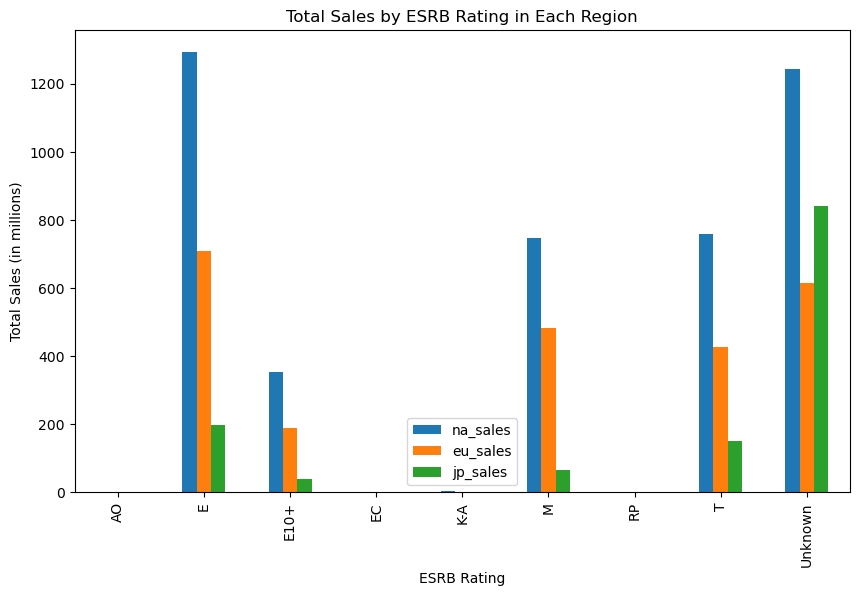

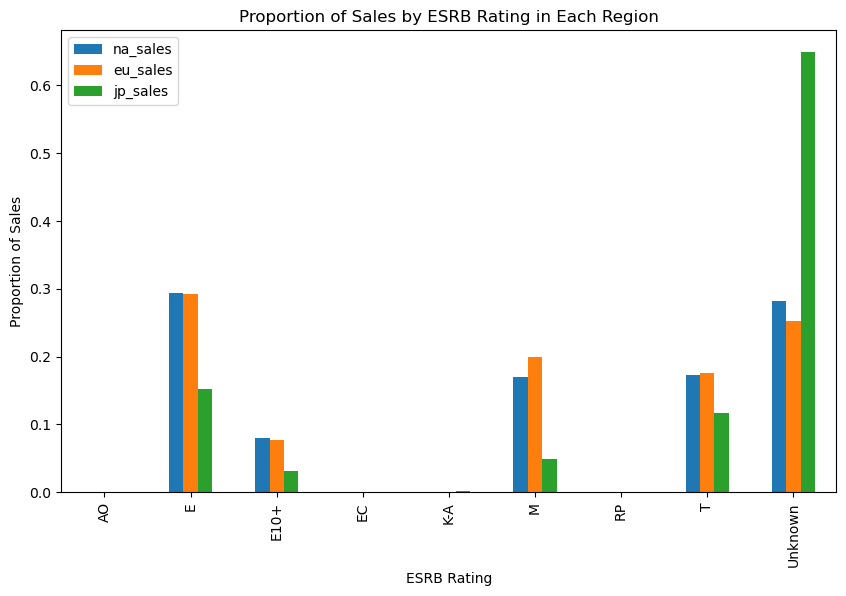

Correlación ESRB-NA Sales: 0.09
Correlación ESRB-EU Sales: 0.11
Correlación ESRB-JP Sales: -0.10


In [513]:
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(esrb_sales)

esrb_sales_normalized = esrb_sales.div(esrb_sales.sum(axis=0), axis=1)
print(esrb_sales_normalized)

esrb_sales.plot(kind='bar', figsize=(10, 6),
                title='Total Sales by ESRB Rating in Each Region',
                ylabel='Total Sales (in millions)',
                xlabel='ESRB Rating')
plt.show()

# Normalized version
esrb_sales_normalized.plot(kind='bar', figsize=(10, 6),
                           title='Proportion of Sales by ESRB Rating in Each Region',
                           ylabel='Proportion of Sales',
                           xlabel='ESRB Rating')
plt.show()

ratings_map = {'E': 1, 'T': 2, 'M': 3, 'Unknown': 0}
df['rating_numeric'] = df['rating'].map(ratings_map)

# Correlación con las ventas por región
na_corr = df[['rating_numeric', 'na_sales']].corr().iloc[0, 1]
eu_corr = df[['rating_numeric', 'eu_sales']].corr().iloc[0, 1]
jp_corr = df[['rating_numeric', 'jp_sales']].corr().iloc[0, 1]

print(f"Correlación ESRB-NA Sales: {na_corr:.2f}")
print(f"Correlación ESRB-EU Sales: {eu_corr:.2f}")
print(f"Correlación ESRB-JP Sales: {jp_corr:.2f}")



###### NA y EU tienen un mercado diverso que incluye tanto juegos familiares como títulos para adolescentes y adultos. Las clasificaciones E, T, y M dominan, mostrando que las preferencias están distribuidas entre varias edades y géneros. En JP, los títulos clasificados como E también tienen presencia, pero los juegos sin clasificación estándar (Unknown) representan la mayoría de las ventas. Esto podría indicar que los consumidores en Japón valoran más los títulos que no pasan por el sistema ESRB

# Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [514]:
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

alpha = 0.05
# Realizar prueba t
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Resultados
print("valor p:", results.pvalue)


# Interpretación
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las calificaciones promedio son iguales.")


valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


- Cómo formulaste las hipótesis nula y alternativa.

###### La hipótesis nula es que las calificaciones promedio de los usuarios para las plataformas XOne y PC son iguales y la hipótesis alternativa es que son diferentes.

- Qué criterio utilizaste para probar las hipótesis y por qué.

###### El criterio utilizado es la prueba t de Student para muestras independientes, con el argumento equal_var=False, lo que indica que no se asume que ambas muestras tengan varianzas iguales. Esto es adecuado en este caso, ya que las plataformas de XOne y PC podrían tener distribuciones de calificaciones diferentes, por lo que las varianzas podrían no ser iguales.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [515]:
accion_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

alpha = 0.05
# Realizar prueba t
results = st.ttest_ind(accion_scores, sports_scores, equal_var=False)

# Resultados
print("valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las calificaciones promedio son iguales.")

valor p: 0.11483818791498288
No se puede rechazar la hipótesis nula: las calificaciones promedio son iguales.


- Cómo formulaste las hipótesis nula y alternativa.

###### La hipótesis nula es que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales, y la hipótesis alternativa sería que las calificaciones promedio son diferentes

- Qué criterio utilizaste para probar las hipótesis y por qué.

###### El criterio utilizado es la prueba t de Student para muestras independientes, con el argumento equal_var=False, lo que indica que no se asume que ambas muestras tengan varianzas iguales. Esto es adecuado en este caso, ya que los géneros de Acción y Deportes podrían tener distribuciones de calificaciones diferentes, por lo que las varianzas podrían no ser iguales.


# Paso 6. Escribe una conclusión general

El análisis de datos ha proporcionado una visión profunda sobre cómo las plataformas, géneros, reseñas y clasificaciones de los juegos influyen en las ventas y las preferencias de los usuarios en distintas regiones. A través de técnicas estadísticas y de visualización, se ha podido observar patrones claros que no solo ayudan a entender el comportamiento de los consumidores, sino que también pueden servir para tomar decisiones más informadas sobre el desarrollo, la comercialización y la distribución de videojuegos.

Este proyecto destaca la importancia de contar con un análisis de datos sólido para comprender las dinámicas de mercado y cómo los diferentes factores afectan el rendimiento de los productos en la industria de los videojuegos. A medida que los datos continúan evolucionando, es crucial seguir aplicando técnicas de ciencia de datos para mantenerse al día con las tendencias y adaptarse rápidamente a los cambios en las preferencias de los consumidores.